![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# Lesson-02 Assignment

   本周课程主要包含了图像基本操作中的卷积/滤波，以及最基础的特征描述算法————Harris Corner和SIFT。希望大家认真复习，理解图像求导/卷积的目的，以及特征的本质。
   本次作业分为阅读部分和算法部分。

## 本次作业的内容

### [Reading]:

You needn't finish reading all of them in just one week!
It's just good for you to know what's happening in this area and to figure out how people try to improve SIFT.

You needn't to remember all of them. 
But please DO REMEMBER procedures of SIFT and HoG. For those who're interested in SLAM, Orb is your inevitable destiny.

1. [optional] Bilateral Filter: https://blog.csdn.net/piaoxuezhong/article/details/78302920
2. Feature Descriptors:
   [Compulsory]
   Hog: https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
   SURF: https://www.vision.ee.ethz.ch/~surf/eccv06.pdf
   [optional]
   BRISK: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.371.1343&rep=rep1&type=pdf
   Orb: http://www.willowgarage.com/sites/default/files/orb_final.pdf [Compulsory for SLAM Guys]
3. Preview parts:
   K-Means: I have no doubts about what you are going to read and where you gonna find the reading materials. There are tons of papers/blogs describing k-means. Just grab one and read.We'll talk about this topic in 3 weeks.

### [Coding]:
Finish 2D convolution/filtering by your self. 
What you are supposed to do can be described as "median blur", which means by using a sliding window on an image, your task is not going to do a normal convolution, but to find the median value within that crop.

You can assume your input has only one channel. (a.k.a a normal 2D list/vector) And you do need to consider the padding method and size. There are 2 padding ways: REPLICA & ZERO. When "REPLICA" is given to you, the padded pixels are same with the border pixels. E.g is [1 2 3] is your image, the padded version will be  [[(...1 1) 1 2 3 (3 3...)]  where how many 1 & 3 in the parenthesis depends on your padding size. When "ZERO", the padded version will be [(...0 0) 1 2 3 (0 0...)]

Assume your input's size of the image is W x H, kernel size's m x n. You may first complete a version with O(W·H·m·n log(m·n)) to O(W·H·m·n·m·n)).

Follow up 1: Can it be completed in a shorter time complexity?

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
img_ori = cv2.imread('lenna.jpg')

In [ ]:
class my_cv(object):
    def medianBlur(self, img, kernel, padding_way, timer=False):
    #        img & kernel is List of List; padding_way a string
    #        Please finish your code under this blank
        # Calculate padding range
        mid_x, mid_y = int(kernel[0]/2), int(kernel[1]/2)
        # Select padding methods (Step 1)
        if timer:
            start = time.clock()
        if padding_way == 'ZERO':
            img_tmp = np.pad(img, (mid_x, mid_y), 'constant', constant_values=(0,))
        elif padding_way == 'REPLICA':
            img_tmp = np.pad(img, (mid_x, mid_y), 'edge')
        if timer:
            elapsed = time.clock() - start
            print("Step 1 elapsed: %.5f" % elapsed)
        # Make a copy of the original image (Step 2)
        if timer:
            start = time.clock()
        img_medianBlur = img.copy()
        if timer:
            elapsed = time.clock() - start
            print("Step 2 elapsed: %.5f" % elapsed)
        # Main loop (Step 3)
        if timer:
            start = time.clock()
        for i in range(mid_x, mid_x+img.shape[0]):
            for j in range(mid_y, mid_y+img.shape[1]):
                # Get kernel from padded array
                kernel_mem = img_tmp[i-mid_x:i+mid_x+1,j-mid_y: j+mid_y+1]
                # Assign median of the kernel to copy
                img_medianBlur[i-mid_x][j-mid_y] = np.median(kernel_mem)
        if timer:
            elapsed = time.clock() - start
            print("Step 3 elapsed: %.5f" % elapsed)
        return img_medianBlur

In [82]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
def test_medianBlur(img, kernel_size, fill):
    B, G, R = cv2.split(img)
    return cv2.merge((my_cv.medianBlur(None, B, kernel_size, fill, timer=True), my_cv.medianBlur(None, G, kernel_size, fill), my_cv.medianBlur(None, R, kernel_size, fill)))
img_midBlur = test_medianBlur(img_ori, (5, 5), 'REPLICA')

Step 1 elapsed: 0.00033
Step 2 elapsed: 0.00008
Step 3 elapsed: 15.61799


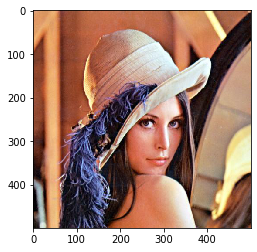

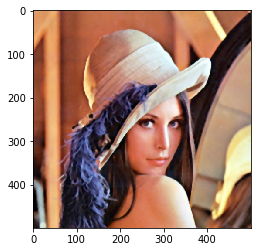

In [65]:
my_show(img_ori)
my_show(img_midBlur)

In [11]:
### Generate test cases
tmp = []
for i in range(1, 24):
    tmp.append(np.random.randint(0, 100, 2**i))

In [12]:
for t in tmp:
    start = time.clock()
    md = np.median(t)
    print("Elapse of np.median for %d numbers: %.5f" % (len(tmp), time.clock()-start))

Elapse of np.median for 23 numbers: 0.00040
Elapse of np.median for 23 numbers: 0.00034
Elapse of np.median for 23 numbers: 0.00019
Elapse of np.median for 23 numbers: 0.00017
Elapse of np.median for 23 numbers: 0.00014
Elapse of np.median for 23 numbers: 0.00017
Elapse of np.median for 23 numbers: 0.00030
Elapse of np.median for 23 numbers: 0.00028
Elapse of np.median for 23 numbers: 0.00024
Elapse of np.median for 23 numbers: 0.00052
Elapse of np.median for 23 numbers: 0.00038
Elapse of np.median for 23 numbers: 0.00069
Elapse of np.median for 23 numbers: 0.00051
Elapse of np.median for 23 numbers: 0.00067
Elapse of np.median for 23 numbers: 0.00090
Elapse of np.median for 23 numbers: 0.00147
Elapse of np.median for 23 numbers: 0.00221
Elapse of np.median for 23 numbers: 0.00401
Elapse of np.median for 23 numbers: 0.00910
Elapse of np.median for 23 numbers: 0.01506
Elapse of np.median for 23 numbers: 0.03873
Elapse of np.median for 23 numbers: 0.07324
Elapse of np.median for 23 numbe

In [13]:
import statistics
for t in tmp:
    start = time.clock()
    md = statistics.median(t.flatten())
    print("Elapse of np.median for %d numbers: %.5f" % (len(tmp), time.clock()-start))

Elapse of np.median for 23 numbers: 0.00006
Elapse of np.median for 23 numbers: 0.00003
Elapse of np.median for 23 numbers: 0.00016
Elapse of np.median for 23 numbers: 0.00005
Elapse of np.median for 23 numbers: 0.00008
Elapse of np.median for 23 numbers: 0.00015
Elapse of np.median for 23 numbers: 0.00026
Elapse of np.median for 23 numbers: 0.00024
Elapse of np.median for 23 numbers: 0.00048
Elapse of np.median for 23 numbers: 0.00082
Elapse of np.median for 23 numbers: 0.00195
Elapse of np.median for 23 numbers: 0.00466
Elapse of np.median for 23 numbers: 0.00925
Elapse of np.median for 23 numbers: 0.01135
Elapse of np.median for 23 numbers: 0.02449
Elapse of np.median for 23 numbers: 0.04554
Elapse of np.median for 23 numbers: 0.09251
Elapse of np.median for 23 numbers: 0.18854
Elapse of np.median for 23 numbers: 0.36421
Elapse of np.median for 23 numbers: 0.75445
Elapse of np.median for 23 numbers: 1.52860
Elapse of np.median for 23 numbers: 3.02404
Elapse of np.median for 23 numbe

In [14]:
def find_median1(k):
    return sorted(k)[len(k)//2]
for t in tmp:
    start = time.clock()
    md = find_median1(t.flatten())
    print("Elapse of np.median for %d numbers: %.5f" % (len(tmp), time.clock()-start))

Elapse of np.median for 23 numbers: 0.00012
Elapse of np.median for 23 numbers: 0.00002
Elapse of np.median for 23 numbers: 0.00002
Elapse of np.median for 23 numbers: 0.00002
Elapse of np.median for 23 numbers: 0.00003
Elapse of np.median for 23 numbers: 0.00006
Elapse of np.median for 23 numbers: 0.00011
Elapse of np.median for 23 numbers: 0.00022
Elapse of np.median for 23 numbers: 0.00046
Elapse of np.median for 23 numbers: 0.00052
Elapse of np.median for 23 numbers: 0.00163
Elapse of np.median for 23 numbers: 0.00554
Elapse of np.median for 23 numbers: 0.00947
Elapse of np.median for 23 numbers: 0.01326
Elapse of np.median for 23 numbers: 0.02032
Elapse of np.median for 23 numbers: 0.03999
Elapse of np.median for 23 numbers: 0.08977
Elapse of np.median for 23 numbers: 0.21929
Elapse of np.median for 23 numbers: 0.36331
Elapse of np.median for 23 numbers: 0.82829
Elapse of np.median for 23 numbers: 1.78212
Elapse of np.median for 23 numbers: 3.02997
Elapse of np.median for 23 numbe

In [18]:
import random
def select_nth(n, items):
    pivot = random.choice(items)
    lesser = [item for item in items if item < pivot]
    if len(lesser) > n:
        return select_nth(n, lesser)
    n -= len(lesser)
    numequal = items.count(pivot)
    if numequal > n:
        return pivot
    n -= numequal
    greater = [item for item in items if item > pivot]
    return select_nth(n, greater)

def find_median2(items):
    if len(items) % 2:
        return select_nth(len(items)//2, items)
    else:
        left  = select_nth((len(items)-1) // 2, items)
        right = select_nth((len(items)+1) // 2, items)
        return (left + right) / 2
for t in tmp:
    t1 = list(t)
    start = time.clock()
    md = find_median2(t1)
    print("Elapse of np.median for %d numbers: %.5f" % (len(tmp), time.clock()-start))

Elapse of np.median for 23 numbers: 0.00013
Elapse of np.median for 23 numbers: 0.00003
Elapse of np.median for 23 numbers: 0.00005
Elapse of np.median for 23 numbers: 0.00004
Elapse of np.median for 23 numbers: 0.00010
Elapse of np.median for 23 numbers: 0.00022
Elapse of np.median for 23 numbers: 0.00028
Elapse of np.median for 23 numbers: 0.00063
Elapse of np.median for 23 numbers: 0.00166
Elapse of np.median for 23 numbers: 0.00165
Elapse of np.median for 23 numbers: 0.00510
Elapse of np.median for 23 numbers: 0.01239
Elapse of np.median for 23 numbers: 0.01286
Elapse of np.median for 23 numbers: 0.01405
Elapse of np.median for 23 numbers: 0.02681
Elapse of np.median for 23 numbers: 0.04463
Elapse of np.median for 23 numbers: 0.13878
Elapse of np.median for 23 numbers: 0.24575
Elapse of np.median for 23 numbers: 0.59577
Elapse of np.median for 23 numbers: 1.07643
Elapse of np.median for 23 numbers: 2.32157
Elapse of np.median for 23 numbers: 4.46318
Elapse of np.median for 23 numbe

### [Reading + Pseudo Code]:
We haven't told RANSAC algorithm this week. So please try to do the reading.

And now, we can describe it here:
    We have 2 sets of points, say, Points A and Points B. We use A.1 to denote the first point in A, B.2 the 2nd point in B and so forth. Ideally, A.1 is corresponding to B.1, ... A.m corresponding B.m. However, it's obvious that the matching cannot be so perfect and the matching in our real world is like: 
    A.1-B.13, A.2-B.24, A.3-x (has no matching), x-B.5, A.4-B.24(This is a wrong matching) ...
    The target of RANSAC is to find out the true matching within this messy.
    
Algorithm for this procedure can be described like this:
    1. Choose 4 pair of points randomly in our matching points. Those four called "inlier" (中文： 内点) while others "outlier" (中文： 外点)
    2. Get the homography of the inliers
    3. Use this computed homography to test all the other outliers. And separated them by using a threshold into two parts:
        a. new inliers which is satisfied our computed homography
        b. new outliers which is not satisfied by our computed homography.
    4. Get our all inliers (new inliers + old inliers) and goto step 2
    5. As long as there's no changes or we have already repeated step 2-4 k, a number actually can be computed, times, we jump out of the recursion. The final homography matrix will be the one that we want.

[WARNING!!! RANSAC is a general method. Here we add our matching background to that.]

Your task: please complete pseudo code (it would be great if you hand in real code!) of this procedure.

Python:
def ransacMatching(A, B):
    A & B: List of List

Follow up 1. For step 3. How to do the "test“? Please clarify this in your code/pseudo code
Follow up 2. How do decide the "k" mentioned in step 5. Think about it mathematically!

You are supposed to hand in the code in 1 week.

In [ ]:
# RANSAC伪代码：
# 1.
# 2.
# 3.
# 4.

### [作业截止时间]

作业能帮助你回顾课堂内容，你又可以通过作业进行代码实操。咱们可要认真、及时的完成作业哦！自布置作业起两周内提交，助教及时批改作业哦～逾期提交不批改。（特殊情况，请找班主任请假。）

这次的作业就到这里了！祝大家学习进步！

![image alt <](http://5b0988e595225.cdn.sohucs.com/images/20190420/1d1070881fd540db817b2a3bdd967f37.gif)